
## Exercises 2


### 02.1
The purpose of these exercises is to calculate the value $I$ of an integral using a MC simulation. Indeed, given the integral $I = \int_\Omega{g(x)p(x)dx}$, where $p(x)$ is a normalized probability distribution function ($p(x) \geq 0 \;\; \forall x \in \Omega \;$ and $\int_\Omega{p(x)dx}=1$)
this could be numerically estimated as: $$ G_N = \frac{1}{N} \sum_{i=1}^N {g(x_i)} \:.$$  Thus $G_N$ is an estimator for $I$.
In this way, the integral is estimated as the mean value of the function images when the preimage is sampled with distribution p(x).
In the exercises below the 1D integral $$I = \int_0^1 \frac{\pi}{2}\cos \big(\pi \frac{x}{2}\big) dx = 1$$ was considered.

#### Part 1: $p(x)$ as uniform distribution

In this first part the estimator $G_N$ was evaluated by sampling a uniform distribution. 
The graph illustrates the estimator trend as a function of the number of blocks used for the media blocking method.

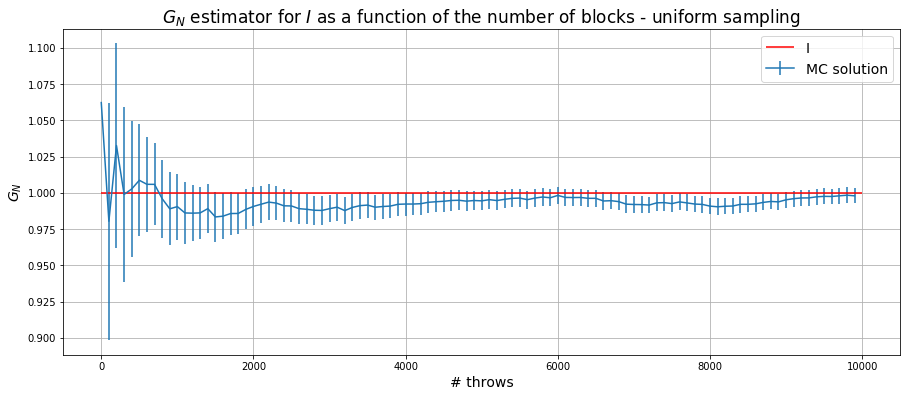

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N=100
L=100
integrale = np.loadtxt( 'integrale_unif.dat',max_rows=N )
err = np.loadtxt( 'integrale_unif_err.dat', max_rows=N )
x = np.arange(N)
x*=L

plt.figure(figsize=(15,6))
plt.errorbar(x,integrale,yerr=err, label="MC solution")
plt.hlines(y=1, xmin=0, xmax=(N*L),label="I", color = "red")
plt.xlabel('# throws',size=14)
plt.ylabel('$G_N$',size=14)
plt.title("$G_N$ estimator for $I$ as a function of the number of blocks - uniform sampling", size=17)
plt.legend(loc="upper right" , fontsize=14)
plt.grid(True)
##plt.show()

#### Part 1: Importance sampling

In this part the function $p(x) = 2(1-x)$ was used as probability distribution function normalized over the interval $[0;1)$. The shape of this function is more similar to the one of $\cos \big(\pi \frac{x}{2}\big)$ than the uniform function. At the sime time, it is quite easy to sample $x_i$ with the inverse method. In conclusion:

- $p(x) = 2(1-x)$
- $g(x) = \frac{1}{2} \frac{1}{1-x} \frac{\pi}{2}\cos \big(\pi \frac{x}{2}\big)$

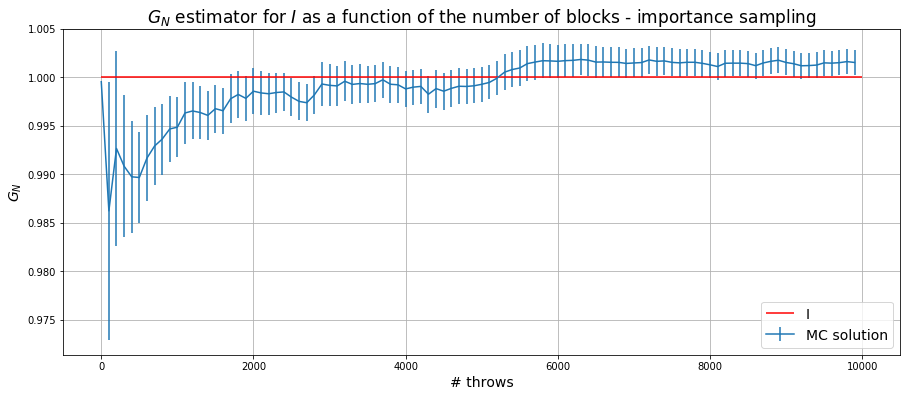

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N=100
L=100
integrale = np.loadtxt( 'integrale_imp.dat',max_rows=N )
err = np.loadtxt( 'integrale_imp_err.dat', max_rows=N )
x = np.arange(N)
x*=L


plt.figure(figsize=(15,6))
plt.errorbar(x,integrale,yerr=err, label="MC solution")
plt.hlines(y=1, xmin=0, xmax=(N*L),label="I", color = "red")
plt.xlabel('# throws',size=14)
plt.ylabel('$G_N$',size=14)
plt.title("$G_N$ estimator for $I$ as a function of the number of blocks - importance sampling", size=17)
plt.legend(loc="lower right" , fontsize=14)
plt.grid(True)
##plt.show()

### 02.2

In this exercise the final position of a random walk was studied as a function of the number of steps starting from the origin.
Two cases were considered: random walk on a cubic lattice (with lattice constant $a=1$) or random walk in the continuum.

The second moments of the final position of the random walks $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ were plotted as a function of the number of steps starting from the origin. The MC results were both fitted with $f(N)=k\sqrt{N}$. This trend probably indicates a diffusive behaviour. Indeed, the fitting function trend is can be inferred from the diffusion equation: ${\langle |\vec{r}_N|^2 \rangle_{RW}} = 2D t $ (t is the number of steps, so $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} = k\sqrt{N}$, with $k=\sqrt{2D}$.

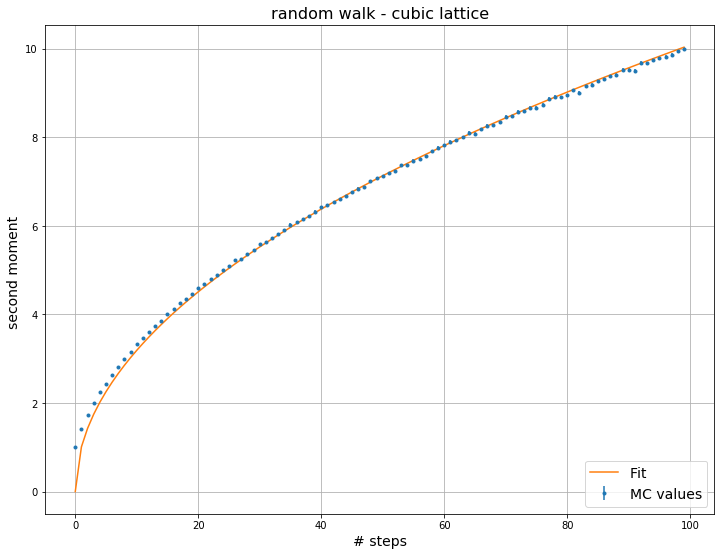

In [13]:
##CUBIC LATTICE

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize

#prova fit
max_numero_passi = 100
x = np.arange(max_numero_passi)
dist2 = np.loadtxt( 'rw_cubico.dat',max_rows=max_numero_passi )
err = np.loadtxt( 'rw_cubico_err.dat',max_rows=max_numero_passi )

def prova_f (N ,k):
    return k*np.sqrt(N)

params = scipy.optimize.curve_fit(prova_f, xdata=x, ydata=dist2)

#grafico
plt.figure(figsize=(12,9))
plt.errorbar(x,dist2,err, fmt='.',label="MC values")
plt.plot(x, prova_f(x,params[0]), label="Fit", c="C1")
plt.title("random walk - cubic lattice", size=16)
plt.xlabel('# steps',size=14)
plt.ylabel('second moment ',size=14)
plt.legend(loc="lower right", fontsize=14)
plt.grid(True)

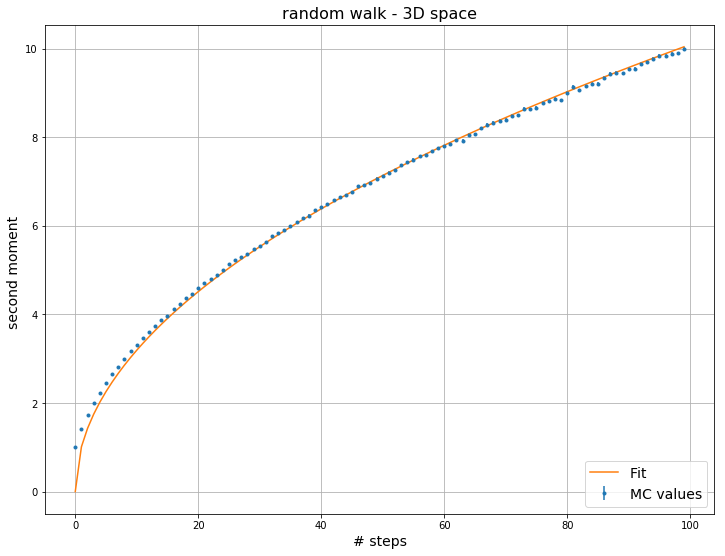

In [14]:
##SPAZIO 3D CONTINUO 1

#prova fit
max_numero_passi = 100
x = np.arange(max_numero_passi)
dist2 = np.loadtxt( 'rw_cont1.dat',max_rows=max_numero_passi )
err = np.loadtxt( 'rw_cont1_err.dat',max_rows=max_numero_passi )

params = scipy.optimize.curve_fit(prova_f, xdata=x, ydata=dist2)

#grafico
plt.figure(figsize=(12,9))
plt.errorbar(x,dist2,err, fmt='.',label="MC values")
plt.plot(x, prova_f(x,params[0]), label="Fit", c="C1")
plt.title("random walk - 3D space", size=16)
plt.xlabel('# steps',size=14)
plt.ylabel('second moment ',size=14)
plt.legend(loc="lower right", fontsize=14)
plt.grid(True)